In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import MoS2_data_cleaning as mo
import find_SS as fs
import os
import re
import numpy as np

In [13]:
directory_path = "C:\\Users\\sophi\\Box\\MoS2Project\\2025-10-18-CVD\\SingleGate\\BGSweep2"  # Replace with your directory path
if not os.path.isdir(f'{directory_path}\sorted'):
    os.mkdir(f'{directory_path}\sorted')
file_list = []
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path):
        file_list.append(file_path)

In [3]:
filename = file_list[0]
df  = pd.read_csv(filename, skiprows=256)
df.drop(df.columns[0], axis=1, inplace=True)

Vbg = df.iloc[1, 2]
df.drop(columns=[' VD', ' IS'], inplace=True)




df.head()


,VTG,Vbg,ID,ITG,Ibg
0,-1.500,0.0,5.480000e-12,-3.010000e-12,-5.000000e-14
1,-1.485,0.0,1.500000e-12,-2.480000e-12,-7.900000e-13
2,-1.470,0.0,2.220000e-12,-2.420000e-12,-2.380000e-12
3,-1.455,0.0,3.970000e-12,-3.480000e-12,-9.900000e-13
4,-1.440,0.0,-1.600000e-13,-1.450000e-12,-6.100000e-13


In [4]:
df[' forward'] = True

df.loc[(df.index >= 201) & (df.index <= 401), ' forward'] = False
df.loc[(df.index >= 603) & (df.index <= 803), ' forward'] = False
df.loc[(df.index >= 1005) & (df.index <= 1205), ' forward'] = False
df.loc[(df.index >= 1407) & (df.index <= 1607), ' forward'] = False
df.loc[(df.index >= 1809) & (df.index <= 2007), ' forward'] = False

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

        VTG   Vbg            ID           ITG           Ibg  forward
0    -1.500  0.00  5.480000e-12 -3.010000e-12 -5.000000e-14     True
1    -1.485  0.00  1.500000e-12 -2.480000e-12 -7.900000e-13     True
2    -1.470  0.00  2.220000e-12 -2.420000e-12 -2.380000e-12     True
3    -1.455  0.00  3.970000e-12 -3.480000e-12 -9.900000e-13     True
4    -1.440  0.00 -1.600000e-13 -1.450000e-12 -6.100000e-13     True
5    -1.425  0.00  5.410000e-12 -2.870000e-12 -1.650000e-12     True
6    -1.410  0.00  2.260000e-12 -1.940000e-12  5.000000e-14     True
7    -1.395  0.00  2.050000e-12 -2.230000e-12 -2.030000e-12     True
8    -1.380  0.00  4.580000e-12 -3.440000e-12 -1.070000e-12     True
9    -1.365  0.00 -1.380000e-12 -8.000000e-13  3.400000e-13     True
10   -1.350  0.00  3.960000e-12 -2.230000e-12 -1.550000e-12     True
11   -1.335  0.00  2.880000e-12 -1.940000e-12 -1.930000e-12     True
12   -1.320  0.00  2.140000e-12 -1.250000e-12 -2.430000e-12     True
13   -1.305  0.00  4.970000e-12 -2

In [5]:
df_new = pd.pivot_table(df,columns=' Vbg',values=[' ID'],index=[' VTG',' forward'])
df_new

# df_sorted.to_csv('IdVd_sorted.csv', index=True)

ID                                            \
 Vbg                     0.00          0.25          0.50          0.75   
 VTG    forward                                                           
-1.500 False     4.930000e-12  2.950000e-12  5.340000e-12  3.200000e-12   
       True      5.480000e-12 -8.370000e-12 -1.070000e-12 -4.450000e-12   
-1.485 False    -7.900000e-13  3.640000e-12  1.340000e-12  1.830000e-12   
       True      1.500000e-12  1.110000e-12  1.440000e-12  2.900000e-13   
-1.470 False     4.220000e-12 -1.230000e-12  3.240000e-12  9.800000e-13   
...                       ...           ...           ...           ...   
 1.470 True      4.044200e-09  7.846500e-09  1.326380e-08  2.156920e-08   
 1.485 False     3.861200e-09  7.997000e-09  1.353760e-08  2.169920e-08   
       True      3.993200e-09  7.996400e-09  1.340340e-08  2.199800e-08   
 1.500 False     4.011900e-09  7.974900e-09  1.370920e-08  2.193680e-08   
       True      3.984400e-09  7.827500e-09  1.363700e-08  2.203120e-08   

                               
 Vbg                     1.00  
 VTG    forward                
-1.500 False              NaN  
       True     -2.310500e-11  
-1.485 False              NaN  
       True     -5.940000e-12  
-1.470 False     1.320000e-12  
...                       ...  
 1.470 True      3.144280e-08  
 1.485 False     3.123540e-08  
       True      3.137220e-08  
 1.500 False     3.141280e-08  
       True      3.145840e-08  

[402 rows x 5 columns]

In [6]:
df_sorted = df_new.sort_values(by=[' forward',' VTG'])
df_sorted

ID                                            \
 Vbg                     0.00          0.25          0.50          0.75   
 VTG    forward                                                           
-1.500 False     4.930000e-12  2.950000e-12  5.340000e-12  3.200000e-12   
-1.485 False    -7.900000e-13  3.640000e-12  1.340000e-12  1.830000e-12   
-1.470 False     4.220000e-12 -1.230000e-12  3.240000e-12  9.800000e-13   
-1.455 False     2.610000e-12  4.810000e-12  3.140000e-12  4.960000e-12   
-1.440 False     2.410000e-12  1.980000e-12 -9.700000e-13 -7.500000e-13   
...                       ...           ...           ...           ...   
 1.440 True      4.077300e-09  7.830400e-09  1.361280e-08  2.140360e-08   
 1.455 True      3.942700e-09  7.904800e-09  1.342700e-08  2.178800e-08   
 1.470 True      4.044200e-09  7.846500e-09  1.326380e-08  2.156920e-08   
 1.485 True      3.993200e-09  7.996400e-09  1.340340e-08  2.199800e-08   
 1.500 True      3.984400e-09  7.827500e-09  1.363700e-08  2.203120e-08   

                               
 Vbg                     1.00  
 VTG    forward                
-1.500 False              NaN  
-1.485 False              NaN  
-1.470 False     1.320000e-12  
-1.455 False    -6.900000e-13  
-1.440 False     4.700000e-12  
...                       ...  
 1.440 True      3.165340e-08  
 1.455 True      3.247820e-08  
 1.470 True      3.144280e-08  
 1.485 True      3.137220e-08  
 1.500 True      3.145840e-08  

[402 rows x 5 columns]

In [7]:
midpoint = len(df_sorted) // 2

# Split the DataFrame into two halves
first_half = df_sorted.iloc[:midpoint]
second_half = df_sorted.iloc[midpoint:]

# Sort the first half in ascending order based on 'col1'
first_half_sorted = first_half.sort_values(by=' VTG', ascending=True)

# Sort the second half in descending order based on 'col1'
second_half_sorted = second_half.sort_values(by=' VTG', ascending=False)

# Concatenate the sorted halves back together
sorted_df = pd.concat([first_half_sorted, second_half_sorted])

print("\nSorted DataFrame (first half ascending, second half descending):")
sorted_df.head()


Sorted DataFrame (first half ascending, second half descending):


ID                                            \
 Vbg                     0.00          0.25          0.50          0.75   
 VTG    forward                                                           
-1.500 False     4.930000e-12  2.950000e-12  5.340000e-12  3.200000e-12   
-1.485 False    -7.900000e-13  3.640000e-12  1.340000e-12  1.830000e-12   
-1.470 False     4.220000e-12 -1.230000e-12  3.240000e-12  9.800000e-13   
-1.455 False     2.610000e-12  4.810000e-12  3.140000e-12  4.960000e-12   
-1.440 False     2.410000e-12  1.980000e-12 -9.700000e-13 -7.500000e-13   

                               
 Vbg                     1.00  
 VTG    forward                
-1.500 False              NaN  
-1.485 False              NaN  
-1.470 False     1.320000e-12  
-1.455 False    -6.900000e-13  
-1.440 False     4.700000e-12

In [8]:
column_names_list = sorted_df.columns.tolist()
column_names_list

[(' ID', 0.0), (' ID', 0.25), (' ID', 0.5), (' ID', 0.75), (' ID', 1.0)]

In [9]:

new_list = []
for tup in column_names_list:
    new_list.append(f'Id, V_bg = {tup[1]}')



sorted_df.columns = new_list
sorted_df

Id, V_bg = 0.0  Id, V_bg = 0.25  Id, V_bg = 0.5  \
 VTG    forward                                                    
-1.500 False       4.930000e-12     2.950000e-12    5.340000e-12   
-1.485 False      -7.900000e-13     3.640000e-12    1.340000e-12   
-1.470 False       4.220000e-12    -1.230000e-12    3.240000e-12   
-1.455 False       2.610000e-12     4.810000e-12    3.140000e-12   
-1.440 False       2.410000e-12     1.980000e-12   -9.700000e-13   
...                         ...              ...             ...   
       True       -1.600000e-13    -8.800000e-13    2.170000e-12   
-1.455 True        3.970000e-12     3.860000e-12   -1.640000e-12   
-1.470 True        2.220000e-12     2.010000e-12    5.050000e-12   
-1.485 True        1.500000e-12     1.110000e-12    1.440000e-12   
-1.500 True        5.480000e-12    -8.370000e-12   -1.070000e-12   

                 Id, V_bg = 0.75  Id, V_bg = 1.0  
 VTG    forward                                   
-1.500 False        3.200000e-12             NaN  
-1.485 False        1.830000e-12             NaN  
-1.470 False        9.800000e-13    1.320000e-12  
-1.455 False        4.960000e-12   -6.900000e-13  
-1.440 False       -7.500000e-13    4.700000e-12  
...                          ...             ...  
       True         2.480000e-12   -1.431000e-11  
-1.455 True        -2.830000e-12   -8.880000e-12  
-1.470 True         2.600000e-12   -1.486000e-11  
-1.485 True         2.900000e-13   -5.940000e-12  
-1.500 True        -4.450000e-12   -2.310500e-11  

[402 rows x 5 columns]

In [10]:

df_new = sorted_df.reset_index().set_index(' VTG')
df_new.drop(columns=[' forward'],inplace=True)

df_new.columns

Index(['Id, V_bg = 0.0', 'Id, V_bg = 0.25', 'Id, V_bg = 0.5',
       'Id, V_bg = 0.75', 'Id, V_bg = 1.0'],
      dtype='object')

In [11]:
df_abs = df_new.abs()
df_abs.head()

,"Id, V_bg = 0.0","Id, V_bg = 0.25","Id, V_bg = 0.5","Id, V_bg = 0.75","Id, V_bg = 1.0"
VTG,,,,,
-1.500,4.930000e-12,2.950000e-12,5.340000e-12,3.200000e-12,NaN
-1.485,7.900000e-13,3.640000e-12,1.340000e-12,1.830000e-12,NaN
-1.470,4.220000e-12,1.230000e-12,3.240000e-12,9.800000e-13,1.320000e-12
-1.455,2.610000e-12,4.810000e-12,3.140000e-12,4.960000e-12,6.900000e-13
-1.440,2.410000e-12,1.980000e-12,9.700000e-13,7.500000e-13,4.700000e-12


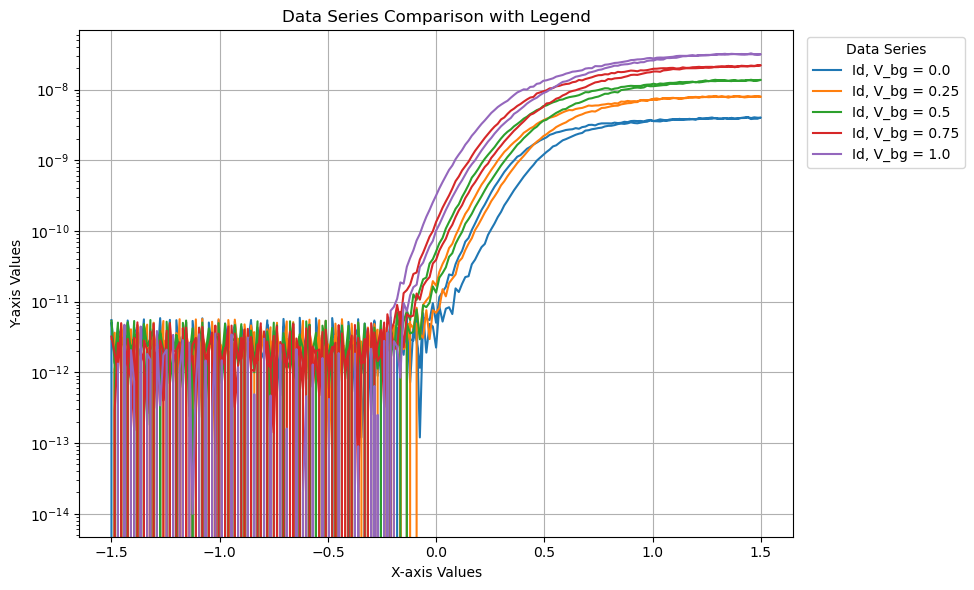

In [ ]:
ax = df_new.plot(kind='line', figsize=(10, 6))

# 3. Add labels and title
plt.title('Data Series Comparison with Legend')
plt.xlabel('X-axis Values')
plt.ylabel('Y-axis Values')
plt.yscale('log')

# 4. Customize and display the legend
plt.legend(title='Data Series', loc='upper right', bbox_to_anchor=(1.25, 1)) # Example of placing legend outside
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels/legend from overlapping
plt.show()

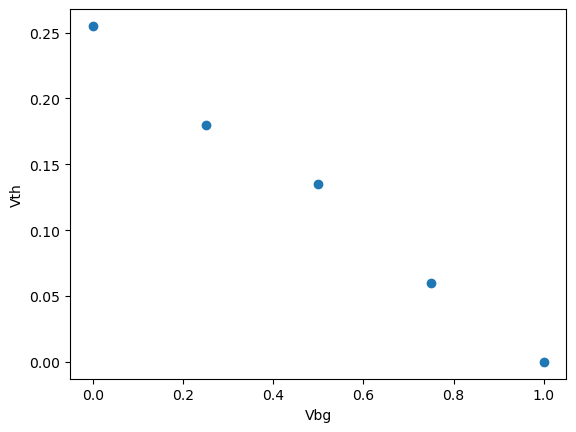

np.float64(-0.252)

In [59]:
Vtg = df_abs.index.to_numpy()

Vbg_val = []
Vth_list = []
for col in df_abs.columns.to_list():
    Vbg_val.append(float(col[10:]))
    current_col = df_abs[col].to_list()
    Id_idx = fs.find_first_Id_above_threshold(current_col,1e-10)
    Vth_list.append(float(Vtg[Id_idx]))
    
slope, intercept = np.polyfit(Vbg_val,Vth_list, 1)
plt.plot(Vbg_val,Vth_list,'o')
plt.xlabel('Vbg')
plt.ylabel('Vth')
plt.show()
slope


In [14]:
slope_list = []
name_list = []
for file in file_list:
    print(f'{file} started')
    name_list.append(file[66:])
    try:
        Vbg,df = mo.read_csv_IdVtg_diffBG(file)
    except Exception:
        print("File not processed")
        continue

    df_reshaped = mo.reshape_table_by_VG_diffBG(df)
    df_sorted = mo.reorder_by_VG_diffBG(df_reshaped,Vbg)
    slope = fs.find_Vth(df_sorted)
    slope_list.append(slope)

    filename =directory_path + '\\sorted\\' + file[66:]
    df_sorted.to_csv(filename, index=True)


Vth_df = pd.DataFrame(list(zip(name_list, slope_list)), columns=['filename', 'slope'])
Vth_df.to_csv(f"{directory_path}\\Vth_vs_Vbg.csv", index=False)

C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\SingleGate\BGSweep2\R10C3-B__ExfoliatedMoS2_TGIdVg_DiffBG_NarrowRange.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\SingleGate\BGSweep2\R10C3-T__ExfoliatedMoS2_TGIdVg_DiffBG_NarrowRange.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\SingleGate\BGSweep2\R10C4-B__ExfoliatedMoS2_TGIdVg_DiffBG_NarrowRange.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\SingleGate\BGSweep2\R10C4-T__ExfoliatedMoS2_TGIdVg_DiffBG_NarrowRange.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\SingleGate\BGSweep2\R11C2-B__ExfoliatedMoS2_TGIdVg_DiffBG_NarrowRange.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\SingleGate\BGSweep2\R11C3-B__ExfoliatedMoS2_TGIdVg_DiffBG_NarrowRange.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\SingleGate\BGSweep2\R11C4-B__ExfoliatedMoS2_TGIdVg_DiffBG_NarrowRange.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\SingleGate\BGSweep2\R11C5-B__ExfoliatedMoS2_TGIdVg_DiffBG_

[np.float64(-0.252),
 np.float64(-0.26999999999999996),
 np.float64(-0.2579999999999999),
 np.float64(-0.25199999999999995),
 np.float64(-0.22199999999999995),
 np.float64(-0.23999999999999994),
 np.float64(-0.24599999999999997),
 np.float64(-0.23999999999999994),
 np.float64(-0.252),
 np.float64(-0.30000000000000016),
 np.float64(-0.2880000000000001),
 np.float64(-0.32399999999999984),
 np.float64(-0.27),
 np.float64(-0.25199999999999995),
 np.float64(-0.258)]